# Climate Change Sonification
## Exploratory Data Analysis

In [1]:
import os, sys
import numpy as np
from netCDF4 import Dataset

import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.axes_divider import make_axes_locatable
from matplotlib import animation 
from IPython.display import HTML, Image
from matplotlib import rcParams
rcParams["font.family"] = "Times New Roman"
# rcParams['animation.html'] = 'html5'

In [2]:
def process_data(frequency):
    PATH = f"data/{frequency}/"
    files = sorted([ f for f in os.listdir(path=PATH) if f.endswith(".nc4") ])
    print(len(files), "files to be read.")

    co2_data = []
    for f in files:
        try:
            co2_data.append(Dataset(PATH + f).variables["XCO2"][:])
        except:
            pass
    print(len(files) - len(co2_data), "files could not be read.")
    print("Size:", sum([sys.getsizeof(d) for d in co2_data]), "bytes")

    return co2_data, files


def animate_co2(frequency="monthly", savepath=None):

    # set up plotting area
    fig, ax = plt.subplots()
    ax.tick_params(
        left=False,
        bottom=False,
        labelleft=False,
        labelbottom=False
    )

    # colorbar
    ax_divider = make_axes_locatable(ax)
    cax = ax_divider.append_axes("right", size="5%", pad="2%")
    cmap = mpl.cm.inferno
    norm = mpl.colors.Normalize(vmin=vmin, vmax=vmax)
    cb = mpl.colorbar.ColorbarBase(
        cax, 
        cmap=cmap,
        norm=norm,
        orientation="vertical"
    )

    def plot_img(data):
        """Plot CO2 values"""
#         data = np.flip(data, axis=0)
        im = ax.pcolormesh(
            data,
            cmap=cmap, 
            vmin=vmin, 
            vmax=vmax,
            animated=True,
            rasterized=True
        )
        return im, 

    # for blitting (optimized raster image animation)
    im, = plot_img(co2_data[0][0,:,:])

    def update(i):  
        im, = plot_img(co2_data[i][0,:,:])

        # axis title
        if frequency == "daily":
            date = files[i].split("_")[4]
            ax.set_title(date[-2:] + " - " + date[-4:-2] + " - " + date[:-4])
        elif frequency == "monthly":
            date = files[i].split("_")[4]
            ax.set_title(date[-2:] + " - " + date[:-2])
        return im,

    # animate
    ani = animation.FuncAnimation(
        fig, 
        update, 
        frames=len(files), 
        interval=500, 
        repeat=True, 
        repeat_delay=1000,
        blit=True 
    )

    # save and display
    plt.tight_layout()
    
    if savepath is not None:
        ani.save(savepath, writer="imagemagick", dpi=150)
    
    return ani

### Monthly Data

In [3]:
co2_data, files = process_data("monthly")
vmin = min([ d.min() for d in co2_data ])
vmax = max([ d.max() for d in co2_data ])

82 files to be read.
0 files could not be read.
Size: 13120 bytes


In [4]:
# Global statistics
means = np.array([ d.mean() for d in co2_data ])
stds = np.array([ d.std() for d in co2_data ])
mins = np.array([ d.min() for d in co2_data ])
maxs = np.array([ d.max() for d in co2_data ])

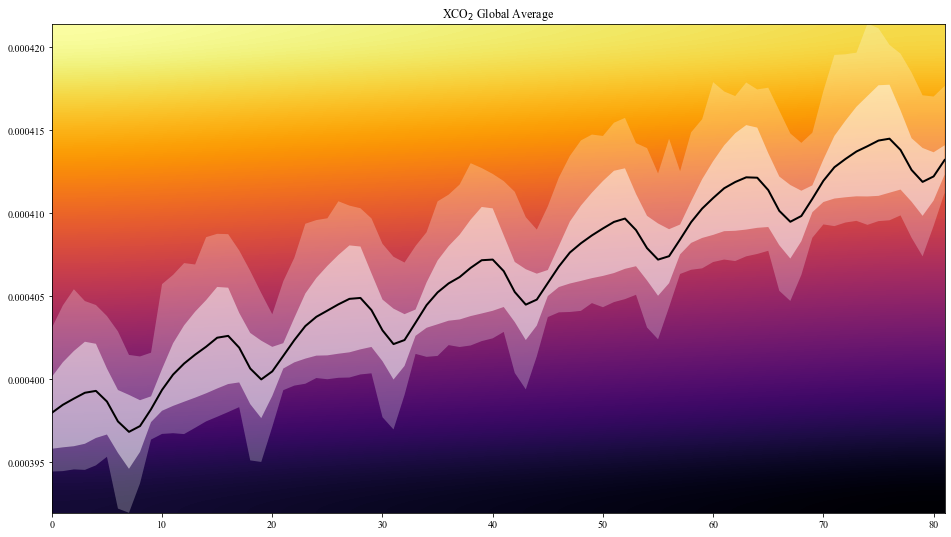

In [5]:
_, ax = plt.subplots(figsize=(16,9))

x = np.arange(len(co2_data))

xmin = x.min()
xmax = x.max()
ymin = mins.min()
ymax = maxs.max()

k = 10
X = np.arange(k * k).reshape(k,k)
ax.imshow(X, interpolation='bicubic', cmap=mpl.cm.inferno_r,
          extent=(xmin, xmax, ymin, ymax), alpha=1, aspect='auto')

ax.plot(means, lw=2, c="black")

# standard deviations
ax.fill_between(x, means, means + stds, facecolor="white", alpha=.5)
ax.fill_between(x, means, means - stds, facecolor="white", alpha=.5)

# extrema
ax.fill_between(x, means, mins, facecolor="white", alpha=.25)
ax.fill_between(x, means, maxs, facecolor="white", alpha=.25)

ax.set_ylim(ymin, ymax)
ax.set_title("XCO$_2$ Global Average")
plt.show()

In [6]:
# %%time

# ani = animate_co2(frequency="monthly", savepath="img/animation_monthly.gif")

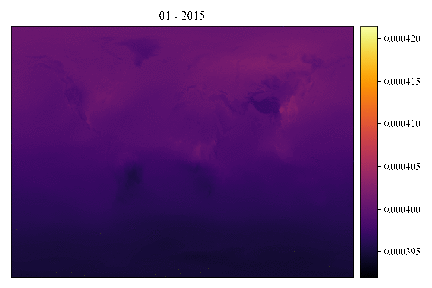

In [7]:
Image("img/animation_monthly.gif")
# HTML(ani.to_html5_video())

### Daily (veeeery slow)

In [8]:
co2_data, files = process_data("daily")
vmin = min([ d.min() for d in co2_data ])
vmax = max([ d.max() for d in co2_data ])

2495 files to be read.
0 files could not be read.
Size: 399200 bytes


In [10]:
# Global statistics
means = np.array([ d.mean() for d in co2_data ])
stds = np.array([ d.std() for d in co2_data ])
mins = np.array([ d.min() for d in co2_data ])
maxs = np.array([ d.max() for d in co2_data ])

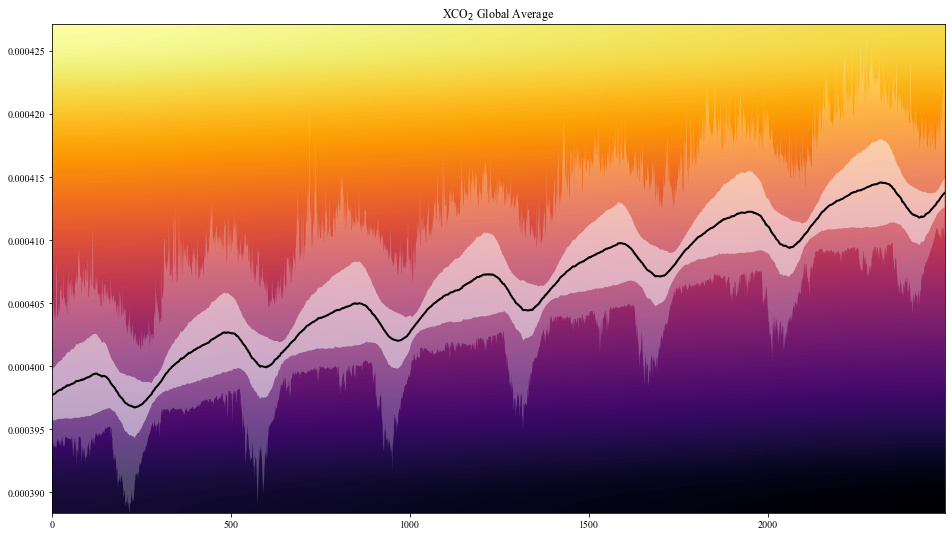

In [11]:
_, ax = plt.subplots(figsize=(16,9))

x = np.arange(len(co2_data))

xmin = x.min()
xmax = x.max()
ymin = mins.min()
ymax = maxs.max()

k = 10
X = np.arange(k * k).reshape(k,k)
ax.imshow(X, interpolation='bicubic', cmap=mpl.cm.inferno_r,
          extent=(xmin, xmax, ymin, ymax), alpha=1, aspect='auto')

ax.plot(means, lw=2, c="black")

# standard deviations
ax.fill_between(x, means, means + stds, facecolor="white", alpha=.5)
ax.fill_between(x, means, means - stds, facecolor="white", alpha=.5)

# extrema
ax.fill_between(x, means, mins, facecolor="white", alpha=.25)
ax.fill_between(x, means, maxs, facecolor="white", alpha=.25)

ax.set_ylim(ymin, ymax)
ax.set_title("XCO$_2$ Global Average")
plt.show()

In [ ]:
# %%time

ani = animate_co2(frequency="monthly", savepath="img/animation_daily.gif")

In [ ]:
Image("img/animation_daily.gif")
# HTML(ani.to_html5_video())